# **Import Modules**

## *python*

In [1]:
# Import python modules
import os
import sys

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._07_portfolio_backtesting import PortfolioBacktester

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Portfolio Optimisation**

In [3]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook
plot_dir = os.path.join(ntbk_dir, "..", "insights", "backtesting")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")

🧪 Running full backesting pipeline...

💾 Combined DataFrame saved to ..\data\processed\combined_return_data.csv
📊 DataFrame head:


,BND,SPY,TSLA
Date,,,
2024-08-01,0.003738,-0.014161,-0.065541
2024-08-02,0.011418,-0.018618,-0.042378
2024-08-05,-0.000941,-0.029124,-0.042327
2024-08-06,-0.006188,0.009220,0.008850
2024-08-07,-0.002437,-0.006684,-0.044258



💾 plot saved to ..\insights\backtesting\portfolio_performance.png


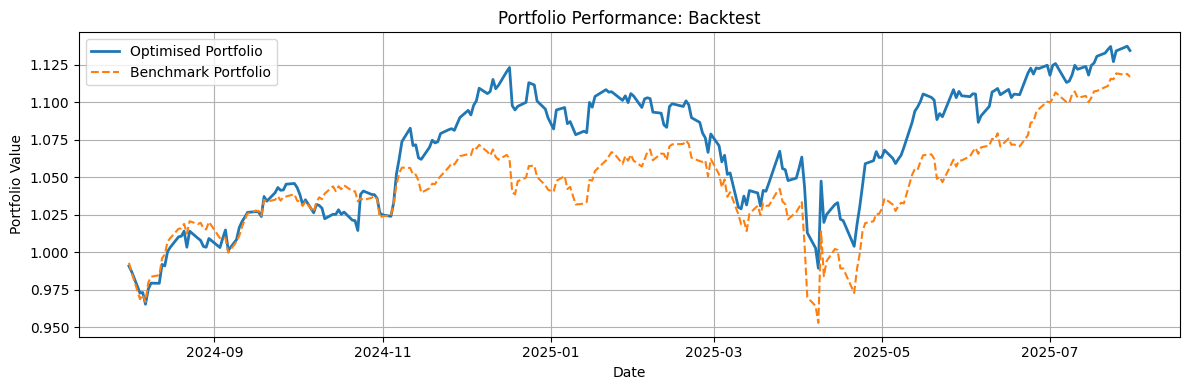


💾 plot saved to ..\insights\backtesting\asset_contributions.png


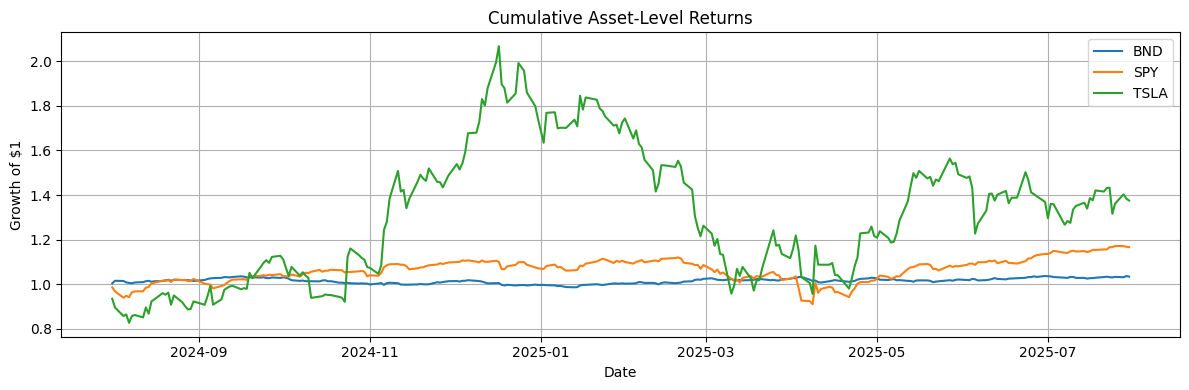


📊 Performance Summary:

Optimised Portfolio:
  Annualised Volatility: 0.1316
  Sharpe Ratio: 1.0350
  Total Return: 0.1343

Benchmark Portfolio:
  Annualised Volatility: 0.1245
  Sharpe Ratio: 0.9601
  Total Return: 0.1168


In [4]:
# Backtesting stock prices
backtester = PortfolioBacktester(
    bnd_path=os.path.join(ntbk_dir, "..", "data/processed/BND_log_enriched.csv"),
    spy_path=os.path.join(ntbk_dir, "..", "data/processed/SPY_log_enriched.csv"),
    tsla_path=(os.path.join(ntbk_dir, "..", "data/processed/TSLA_log_enriched.csv")),
    processed_dir=processed_dir,
    plot_dir=plot_dir,
    start_date="2024-08-01",
    end_date="2025-07-31",
    optimal_weights={
        "TSLA": 0.10093,
        "BND": 0.57127,
        "SPY": 0.32781,
    },  # from 06_portfolio_optimisation.ipynb
    benchmark_weights={"TSLA": 0.0, "SPY": 0.6, "BND": 0.4},  # Given
)
backtester.run_backtest()